In [1]:
import scvelo as scv
import scanpy as sc
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import utils
import importlib
import pandas as pd 
importlib.reload(utils)
import gc

In [2]:
DATA_DIR = Path("/root/autodl-tmp/dataset") 
DATASET = "repro_mouse_morris"
K_FOLD = 10
CLUSTER_KEY = 'day'
SEED = 1234

In [3]:
(DATA_DIR / DATASET / "raw").mkdir(parents=True, exist_ok=True)
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "processed").mkdir(parents=True, exist_ok=True)

## Load the full dataset

In [4]:
adata = sc.read_h5ad(DATA_DIR / DATASET / "raw" / f"{DATASET}.h5ad")
adata = adata[~pd.isna(adata.obs['reprogramming_day']), :]

In [5]:
adata.obs[CLUSTER_KEY] = pd.Categorical(adata.obs['reprogramming_day'])

## Split the data

In [6]:
sub_adata_lst = utils.split_anndata_stratified(adata, n_splits=K_FOLD, cluster_key=CLUSTER_KEY)

## Preprocessing each sub adata

In [7]:
adata.layers['raw_spliced'] = adata.layers['spliced']
adata.layers['raw_unspliced'] = adata.layers['unspliced']
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
if adata.n_vars < 2000:
    sc.pp.highly_variable_genes(adata, n_top_genes=adata.n_vars, subset=True)
if 'X_pca' in adata.obsm:
    del adata.obsm['X_pca']
    del adata.uns['pca']
if "neighbors" in adata.uns.keys():
    del adata.uns['neighbors']
scv.pp.moments(adata, n_neighbors=30, n_pcs=30)
utils.fill_in_neighbors_indices(adata)
sc.tl.umap(adata, random_state=SEED)
adata.obs['u_lib_size_raw'] = adata.layers['raw_unspliced'].toarray().sum(-1) 
adata.obs['s_lib_size_raw'] = adata.layers['raw_spliced'].toarray().sum(-1)
if SAVE_DATA:
    adata.write_h5ad(DATA_DIR / DATASET / "processed" / f"adata_preprocessed_full.h5ad")
del adata
gc.collect()

for i in range(5):
    sub_adata = sub_adata_lst[i].copy()
    sub_adata.layers['raw_spliced'] = sub_adata.layers['spliced']
    sub_adata.layers['raw_unspliced'] = sub_adata.layers['unspliced']
    scv.pp.filter_and_normalize(sub_adata, min_shared_counts=20, n_top_genes=2000)
    if sub_adata.n_vars < 2000:
        sc.pp.highly_variable_genes(sub_adata, n_top_genes=sub_adata.n_vars, subset=True)
    if 'X_pca' in sub_adata.obsm:
        del sub_adata.obsm['X_pca']
    if 'pca' in sub_adata.uns:
        del sub_adata.uns['pca']
    if "neighbors" in sub_adata.uns.keys():
        del sub_adata.uns['neighbors']
    scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
    utils.fill_in_neighbors_indices(sub_adata)
    sc.tl.umap(sub_adata, random_state=SEED)
    sub_adata.obs['u_lib_size_raw'] = sub_adata.layers['raw_unspliced'].toarray().sum(-1) 
    sub_adata.obs['s_lib_size_raw'] = sub_adata.layers['raw_spliced'].toarray().sum(-1)
    if SAVE_DATA:
        sub_adata.write_h5ad(DATA_DIR / DATASET / "processed" / f"adata_preprocessed_{i}.h5ad")
    del sub_adata
    gc.collect()

Filtered out 13060 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_10086/4117715274.py:34: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be remov

computing neighbors
    finished (0:00:29) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 13038 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_10086/4117715274.py:34: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be remov

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 13045 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_10086/4117715274.py:34: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be remov

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 13073 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_10086/4117715274.py:34: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be remov

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 13059 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_10086/4117715274.py:34: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/root/autodl-tmp/conda/envs/velo/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be remov

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


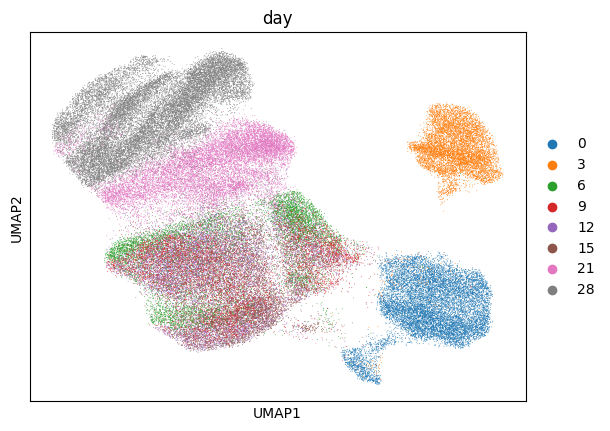

In [8]:
adata = sc.read(DATA_DIR / DATASET / "processed" / f"adata_preprocessed_full.h5ad")
sc.pl.umap(adata, color=["day"])

# subset 细胞用于计算时间和内存

In [9]:
# cell_counts = [500, 1000, 3000, 5000, 10000]
# n_total = adata.n_obs

# for n in cell_counts:
#     np.random.seed(SEED)
#     n_sub = min(n, n_total)  # 防止超过总数
#     idx = np.random.choice(n_total, n_sub, replace=False)  # 随机选择细胞索引
#     sub_adata = adata[idx].copy()  # 生成子集
    
#     sub_adata.layers['raw_spliced'] = sub_adata.layers['spliced']
#     sub_adata.layers['raw_unspliced'] = sub_adata.layers['unspliced']
#     scv.pp.filter_and_normalize(sub_adata, min_shared_counts=20, n_top_genes=2000)
#     if sub_adata.n_vars < 2000:
#         sc.pp.highly_variable_genes(sub_adata, n_top_genes=sub_adata.n_vars, subset=True)
#     if 'X_pca' in sub_adata.obsm:
#         del sub_adata.obsm['X_pca']
#     if 'pca' in sub_adata.uns:
#         del sub_adata.uns['pca']
#     if "neighbors" in sub_adata.uns.keys():
#         del sub_adata.uns['neighbors']
#     scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
#     utils.fill_in_neighbors_indices(sub_adata)
#     sc.tl.umap(sub_adata, random_state=SEED)
#     sub_adata.obs['u_lib_size_raw'] = sub_adata.layers['raw_unspliced'].toarray().sum(-1) 
#     sub_adata.obs['s_lib_size_raw'] = sub_adata.layers['raw_spliced'].toarray().sum(-1)
#     if SAVE_DATA:
#         sub_adata.write_h5ad(DATA_DIR / DATASET / "processed" / f"adata_preprocessed_{n}.h5ad")
#     del sub_adata
#     gc.collect()

In [10]:
# gene_counts = [500, 1000, 2000,3000,4000,5000]
# n_total = adata.n_obs

# for n in gene_counts:
#     np.random.seed(SEED)
#     n_sub = 5000
#     idx = np.random.choice(n_total, n_sub, replace=False)  # 随机选择细胞索引
#     sub_adata = adata[idx].copy()  # 生成子集
    
#     sub_adata.layers['raw_spliced'] = sub_adata.layers['spliced']
#     sub_adata.layers['raw_unspliced'] = sub_adata.layers['unspliced']
#     scv.pp.filter_and_normalize(sub_adata, min_shared_counts=20, n_top_genes=n)
#     if sub_adata.n_vars < n:
#         sc.pp.highly_variable_genes(sub_adata, n_top_genes=sub_adata.n_vars, subset=True)
#     if 'X_pca' in sub_adata.obsm:
#         del sub_adata.obsm['X_pca']
#     if 'pca' in sub_adata.uns:
#         del sub_adata.uns['pca']
#     if "neighbors" in sub_adata.uns.keys():
#         del sub_adata.uns['neighbors']
#     scv.pp.moments(sub_adata, n_neighbors=30, n_pcs=30)
#     utils.fill_in_neighbors_indices(sub_adata)
#     sc.tl.umap(sub_adata, random_state=SEED)
#     sub_adata.obs['u_lib_size_raw'] = sub_adata.layers['raw_unspliced'].toarray().sum(-1) 
#     sub_adata.obs['s_lib_size_raw'] = sub_adata.layers['raw_spliced'].toarray().sum(-1)
#     if SAVE_DATA:
#         sub_adata.write_h5ad(DATA_DIR / DATASET / "processed" / "genes" / f"adata_preprocessed_{n}.h5ad")
#     del sub_adata
#     gc.collect()